In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import tensorboard as tb

In [2]:
experiment_id = "HwSpIE8WRgq9BTWpyCp3tw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
experiment

In [3]:
df = experiment.get_scalars()

In [4]:
print(df["run"].unique())
print(df["tag"].unique())

['ssc-exodus-100000.0/version_0' 'ssc-exodus-100000.0/version_1'
 'ssc-exodus-100000.0/version_2' 'ssc-exodus-100000.0/version_3'
 'ssc-exodus-100000.0/version_4' 'ssc-slayer-100000.0/version_0'
 'ssc-slayer-100000.0/version_1' 'ssc-slayer-100000.0/version_2'
 'ssc-slayer-100000.0/version_3' 'ssc-slayer-100000.0/version_4']
['epoch' 'grad_2.0_norm/network.0.0.weight_epoch'
 'grad_2.0_norm/network.0.0.weight_step'
 'grad_2.0_norm/network.1.0.weight_epoch'
 'grad_2.0_norm/network.1.0.weight_step'
 'grad_2.0_norm/network.2.0.weight_epoch'
 'grad_2.0_norm/network.2.0.weight_step'
 'grad_2.0_norm/network.3.weight_epoch'
 'grad_2.0_norm/network.3.weight_step' 'grad_2.0_norm_total_epoch'
 'grad_2.0_norm_total_step' 'hp_metric' 'train_loss' 'valid_acc'
 'valid_loss' 'grad_2.0_norm/linear_hidden.0.weight_epoch'
 'grad_2.0_norm/linear_hidden.0.weight_step'
 'grad_2.0_norm/linear_hidden.1.weight_epoch'
 'grad_2.0_norm/linear_hidden.1.weight_step'
 'grad_2.0_norm/linear_input.weight_epoch'
 'grad_

In [5]:
dfw = df.pivot_table(
        values="value",
        index=["run", "step"],
        columns="tag",
        dropna=False,
    )
dfw = dfw.reset_index()
dfw.columns.name = None
dfw.columns.names = [None for name in dfw.columns.names]

In [6]:
print(dfw["run"].unique())

['ssc-exodus-100000.0/version_0' 'ssc-exodus-100000.0/version_1'
 'ssc-exodus-100000.0/version_2' 'ssc-exodus-100000.0/version_3'
 'ssc-exodus-100000.0/version_4' 'ssc-slayer-100000.0/version_0'
 'ssc-slayer-100000.0/version_1' 'ssc-slayer-100000.0/version_2'
 'ssc-slayer-100000.0/version_3' 'ssc-slayer-100000.0/version_4']


In [7]:
dfw["step"] = dfw["step"] * dfw["epoch"].max() / dfw["step"].max()

In [8]:
df_scale_1 = dfw[dfw["run"].str.endswith("00.0/version_0") | dfw["run"].str.endswith("00.0/version_1") | dfw["run"].str.endswith("00.0/version_2")]

In [9]:
print(df_scale_1["run"].unique())

['ssc-exodus-100000.0/version_0' 'ssc-exodus-100000.0/version_1'
 'ssc-exodus-100000.0/version_2' 'ssc-slayer-100000.0/version_0'
 'ssc-slayer-100000.0/version_1' 'ssc-slayer-100000.0/version_2']


In [10]:
method_split = df_scale_1.run.apply(lambda run: f"{run.split('-')[1]}".upper())
method_split.name = None

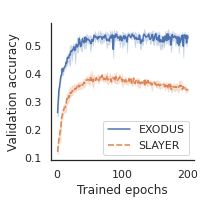

In [11]:
sns.set(font_scale=1  , style="white")
plt.figure(figsize=(3,3))
plot = sns.lineplot(data=df_scale_1, x="step", y="valid_acc", hue=method_split, style=method_split, color='black')
plot.set(title=" ", xlabel="Trained epochs", ylabel="Validation accuracy", )
plot.axes.spines['top'].set_visible(False)
plot.axes.spines['right'].set_visible(False)
# plot.set_ylabel(None)
plt.tight_layout()
plt.savefig('ssc_accuracy.svg')

In [12]:
df_exodus_0 = dfw[dfw["run"].str.endswith("exodus-100000.0/version_0")]
df_exodus_1 = dfw[dfw["run"].str.endswith("exodus-100000.0/version_1")]
df_exodus_2 = dfw[dfw["run"].str.endswith("exodus-100000.0/version_2")]

import numpy as np
print(np.array([df_exodus_0["valid_acc"].max(), df_exodus_1["valid_acc"].max(), df_exodus_2["valid_acc"].max()]).mean())
print(np.array([df_exodus_0["valid_acc"].max(), df_exodus_1["valid_acc"].max(), df_exodus_2["valid_acc"].max()]).std())

0.5540527105331421
0.004265639303283254


In [13]:
df_slayer_0 = dfw[dfw["run"].str.endswith("slayer-100000.0/version_0")]
df_slayer_1 = dfw[dfw["run"].str.endswith("slayer-100000.0/version_1")]
df_slayer_2 = dfw[dfw["run"].str.endswith("slayer-100000.0/version_2")]

import numpy as np
print(np.array([df_slayer_0["valid_acc"].max(), df_slayer_1["valid_acc"].max(), df_slayer_2["valid_acc"].max()]).mean())
print(np.array([df_slayer_0["valid_acc"].max(), df_slayer_1["valid_acc"].max(), df_slayer_2["valid_acc"].max()]).std())

0.40066125988960266
0.0085088995431631


In [14]:
exodus_df_1 = dfw[dfw["run"] == "ssc-exodus-100000.0/version_2"]
exodus_df_01 = dfw[dfw["run"] == "ssc-exodus-100000.0/version_4"]
exodus_df_001 = dfw[dfw["run"] == "ssc-exodus-100000.0/version_3"]
slayer_df_1 = dfw[dfw["run"] == "ssc-slayer-100000.0/version_2"]
slayer_df_01 = dfw[dfw["run"] == "ssc-slayer-100000.0/version_4"]
slayer_df_001 = dfw[dfw["run"] == "ssc-slayer-100000.0/version_3"]

gdf = pd.DataFrame({
    'algorithm': ['EXODUS', 'EXODUS', 'EXODUS', 'EXODUS', 'SLAYER', 'SLAYER', 'SLAYER', 'SLAYER', 'EXODUS', 'EXODUS', 'EXODUS', 'EXODUS', 'SLAYER', 'SLAYER', 'SLAYER', 'SLAYER', 'EXODUS', 'EXODUS', 'EXODUS', 'EXODUS',   'SLAYER', 'SLAYER', 'SLAYER', 'SLAYER'],
    'Layer': [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
    'Gradient scaling': [1, 1, 1, 1, 1, 1, 1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    'Mean 2-norm': [
        exodus_df_1["grad_2.0_norm/network.0.0.weight_epoch"].mean(),
        exodus_df_1["grad_2.0_norm/network.1.0.weight_epoch"].mean(),
        exodus_df_1["grad_2.0_norm/network.2.0.weight_epoch"].mean(),
        exodus_df_1["grad_2.0_norm/network.3.weight_epoch"].mean(),
        slayer_df_1["grad_2.0_norm/linear_input.weight_epoch"].mean(),
        slayer_df_1["grad_2.0_norm/linear_hidden.0.weight_epoch"].mean(),
        slayer_df_1["grad_2.0_norm/linear_hidden.1.weight_epoch"].mean(),
        slayer_df_1["grad_2.0_norm/linear_output.weight_epoch"].mean(),
        exodus_df_01["grad_2.0_norm/network.0.0.weight_epoch"].mean(),
        exodus_df_01["grad_2.0_norm/network.1.0.weight_epoch"].mean(),
        exodus_df_01["grad_2.0_norm/network.2.0.weight_epoch"].mean(),
        exodus_df_01["grad_2.0_norm/network.3.weight_epoch"].mean(),
        slayer_df_01["grad_2.0_norm/linear_input.weight_epoch"].mean(),
        slayer_df_01["grad_2.0_norm/linear_hidden.0.weight_epoch"].mean(),
        slayer_df_01["grad_2.0_norm/linear_hidden.1.weight_epoch"].mean(),
        slayer_df_01["grad_2.0_norm/linear_output.weight_epoch"].mean(),
        exodus_df_001["grad_2.0_norm/network.0.0.weight_epoch"].mean(),
        exodus_df_001["grad_2.0_norm/network.1.0.weight_epoch"].mean(),
        exodus_df_001["grad_2.0_norm/network.2.0.weight_epoch"].mean(),
        exodus_df_001["grad_2.0_norm/network.3.weight_epoch"].mean(),
        slayer_df_001["grad_2.0_norm/linear_input.weight_epoch"].mean(),
        slayer_df_001["grad_2.0_norm/linear_hidden.0.weight_epoch"].mean(),
        slayer_df_001["grad_2.0_norm/linear_hidden.1.weight_epoch"].mean(),
        slayer_df_001["grad_2.0_norm/linear_output.weight_epoch"].mean(),
        ]
})
# gdf

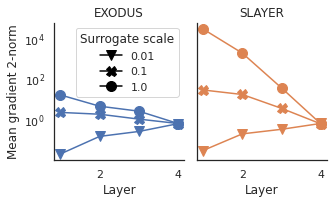

In [15]:
sns.set(font_scale=1, style="white")
hue_kw_args = {"marker" : ["v", "X", "o",]}
g = sns.FacetGrid(gdf, col="algorithm", hue="Gradient scaling", hue_kws=hue_kw_args, height=3, aspect=0.8, legend_out=False)
g.map(plt.plot, "Layer", "Mean 2-norm", linestyle="-", markersize=10, color='black')
g.set_titles('{col_name}')
axes = g.axes[0]
axes[0].legend(title="Surrogate scale")
axes[0].set_ylabel("Mean gradient 2-norm")
for line in axes[0].get_lines():
    line.set_color('C0')
for line in axes[1].get_lines():
    line.set_color("C1")
plt.yscale("log")
plt.tight_layout()
plt.savefig(f"ssc_mean_gradnorm.svg")

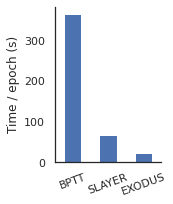

In [16]:
# index = ['SSC']    

bptt = [6*60+4]

slayer = [60+6]

exodus = [23]

data = [6*60+4, 60+6, 23]
df = pd.DataFrame(data , index=['BPTT', 'SLAYER', 'EXODUS'])

ax = df.plot.bar(figsize=(2.5,3))
ax.set_ylabel("Time / epoch (s)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("ssc_time.svg")

/tmp/ipykernel_306/419116025.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)


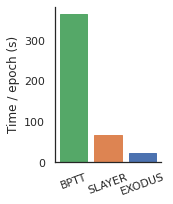

In [17]:
fig = plt.figure(figsize=(2.5, 3))
barlist=plt.bar(['BPTT', 'SLAYER', 'EXODUS'], [6*60+4, 60+6, 23]) #, width=1)
barlist[0].set_color('C2')
barlist[1].set_color('C1')
barlist[2].set_color('C0')

ax = fig.get_axes()[0]
ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
ax.set_ylabel("Time / epoch (s)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("ssc_time.svg")
